In [1]:
!pip install -q kaggle

from google.colab import files
print("Upload your kaggle.json file:")
uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset -p /tmp --unzip

Upload your kaggle.json file:


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 97% 764M/788M [00:07<00:00, 234MB/s]
100% 788M/788M [00:07<00:00, 109MB/s]


In [2]:
!pip install -q opencv-python
!pip install -q tensorflow


In [3]:
from PIL import Image
import cv2
import os
import numpy as np
import shutil
import pathlib

# Dataset paths
cat_source = '/tmp/PetImages/Cat'
dog_source = '/tmp/PetImages/Dog'

cat_files = [os.path.join(cat_source, f) for f in os.listdir(cat_source)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
dog_files = [os.path.join(dog_source, f) for f in os.listdir(dog_source)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(cat_files)} cat images and {len(dog_files)} dog images")

def is_valid_cv_image(filepath):
    try:
        img = cv2.imread(filepath)
        if img is None:
            return False
        h, w, c = img.shape
        if c != 3 or h < 50 or w < 50:
            return False
        return True
    except:
        return False

valid_cat_files = [f for f in cat_files if is_valid_cv_image(f)]
valid_dog_files = [f for f in dog_files if is_valid_cv_image(f)]

print(f"Valid images - Cats: {len(valid_cat_files)}, Dogs: {len(valid_dog_files)}")
print(f"Removed corrupted images: {(len(cat_files)+len(dog_files))-(len(valid_cat_files)+len(valid_dog_files))}")

def fix_image(filepath):
    try:
        img = Image.open(filepath).convert('RGB')
        img.save(filepath, 'JPEG')
        return True
    except:
        os.remove(filepath)
        return False

for f in valid_cat_files + valid_dog_files:
    fix_image(f)

base_dir = '/tmp/organized_dataset'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.makedirs(base_dir, exist_ok=True)

for split in ['training', 'validation']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

np.random.seed(42)
np.random.shuffle(valid_cat_files)
np.random.shuffle(valid_dog_files)

# 90% training, 10% validation
cat_training = valid_cat_files[:int(len(valid_cat_files)*0.9)]
cat_val = valid_cat_files[int(len(valid_cat_files)*0.9):]
dog_training = valid_dog_files[:int(len(valid_dog_files)*0.9)]
dog_val = valid_dog_files[int(len(valid_dog_files)*0.9):]

for src_list, split, category in [
    (cat_training, 'training', 'cats'), (cat_val, 'validation', 'cats'),
    (dog_training, 'training', 'dogs'), (dog_val, 'validation', 'dogs')
]:
    for src in src_list:
        dst = os.path.join(base_dir, split, category, os.path.basename(src))
        try:
            shutil.copy(src, dst)
        except:
            pass

print(f"Training images: {len(cat_training)+len(dog_training)}")
print(f"Validation images: {len(cat_val)+len(dog_val)}")

# Remove non-image files
def remove_non_images(directory):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    removed = 0
    for path in pathlib.Path(directory).rglob('*'):
        if path.is_file() and path.suffix.lower() not in valid_extensions:
            print(f"Removing non-image file: {path}")
            path.unlink()
            removed += 1
    print(f"Removed {removed} non-image files from {directory}\n")

remove_non_images(base_dir)

from PIL import Image

for split in ['training', 'validation']:
    for category in ['cats', 'dogs']:
        folder = os.path.join(base_dir, split, category)
        for fname in os.listdir(folder):
            fpath = os.path.join(folder, fname)
            try:
                img = Image.open(fpath)
                img.verify()
            except:
                print("invalid:", fpath)





Found 12500 cat images and 12500 dog images
Valid images - Cats: 12491, Dogs: 12491
Removed corrupted images: 18


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Training images: 22482
Validation images: 2500
Removed 0 non-image files from /tmp/organized_dataset



In [4]:
# Store results
results = []

**Experiment 1 - FROM SCRATCH WITH 1,000 SAMPLES**

Dataset created: 1000 training, 500 val, 500 test
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.4905 - loss: 0.7083 - val_accuracy: 0.5000 - val_loss: 0.8087
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5016 - loss: 0.7117 - val_accuracy: 0.5000 - val_loss: 0.6972
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4904 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5321 - loss: 0.6902 - val_accuracy: 0.5700 - val_loss: 0.6916
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5361 - loss: 0.6896 - val_accuracy: 0.5420 - val_loss: 0.6865
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5484 - loss: 0.6961 - val_accuracy: 0.5800 - val_loss: 0.6683
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5687 - loss: 0.6785 - val_accuracy: 0.5580 - val_loss: 0.6731
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5717 - loss: 0.6869 - val_accuracy: 0.6060 - v

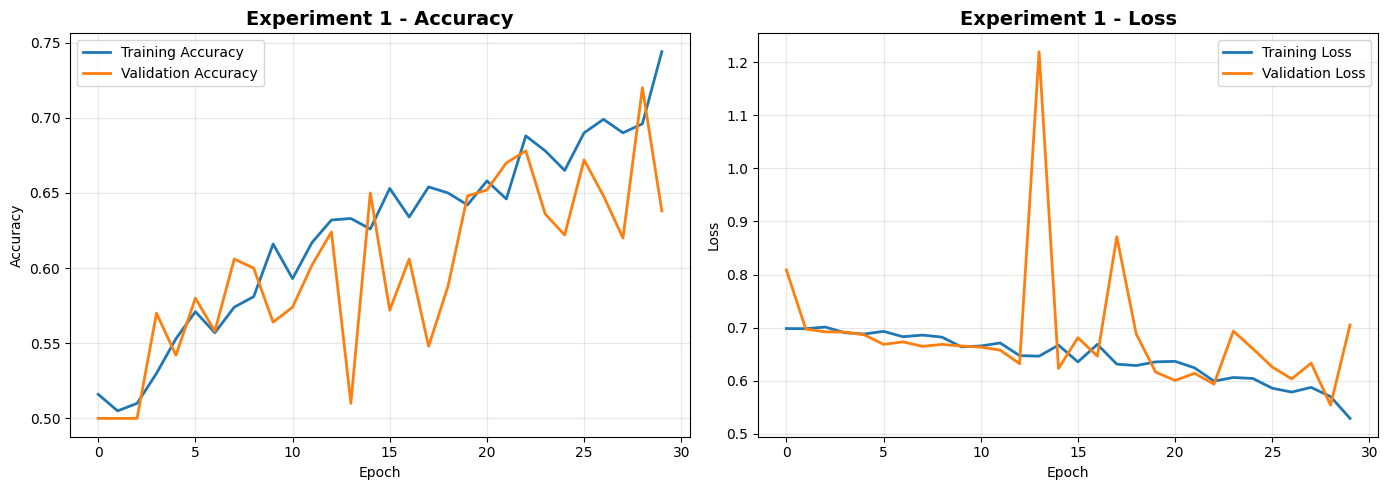

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

training_size = 1000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_1000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    files_per_category_training = training_size // 2
    files_per_category_test = test_size // 2
    files_per_category_val = val_size // 2

    training_files = all_training_files[:files_per_category_training]
    test_files = all_training_files[files_per_category_training:files_per_category_training + files_per_category_test]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:files_per_category_val]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'training', category, fname))

    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'test', category, fname))

    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname),
                   os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'training'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'validation'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'test'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    training_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Experiment 1 RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")



results.append({
    'experiment': 'Experiment 1: From Scratch - 1,000 samples',
    'training_size': 1000,
    'model_type': 'scratch',
    'test_accuracy': test_acc,
    'test_loss': test_loss,
    'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']),
    'epochs_trained': len(history.history['accuracy'])
})


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Experiment 1 - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Experiment 1 - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Experiment 2 - FROM SCRATCH WITH 10,000 SAMPLES**


Dataset created: 10000 training, 500 val, 500 test
Found 10000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5201 - loss: 0.6952 - val_accuracy: 0.5900 - val_loss: 0.6596
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.6173 - loss: 0.6538 - val_accuracy: 0.6480 - val_loss: 0.6239
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6631 - loss: 0.6165 - val_accuracy: 0.7200 - val_loss: 0.5506
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7042 - loss: 0.5716 - val_accuracy: 0.7420 - val_loss: 0.5260
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7336 - loss: 0.5354 - val_accuracy: 0.7300 - val_loss: 0.5835
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.7560 - loss: 0.5017 - val_accuracy: 0.8020 - val_loss: 0.4303
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7782 - loss: 0.4674 - val_accuracy: 0.8080 - val_loss: 0.4169
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7943 - loss: 0.4482 - 

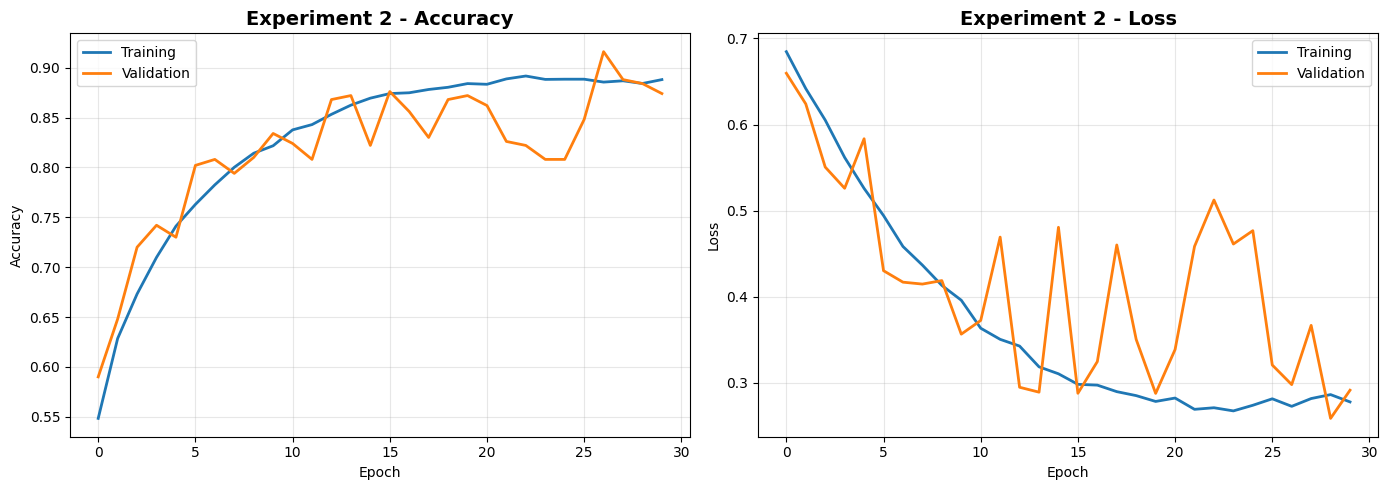

In [6]:
training_size = 10000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_10000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    files_per_category_training = training_size // 2
    files_per_category_test = test_size // 2
    files_per_category_val = val_size // 2

    training_files = all_training_files[:files_per_category_training]
    test_files = all_training_files[files_per_category_training:files_per_category_training + files_per_category_test]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:files_per_category_val]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'training', category, fname))

    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'test', category, fname))

    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname),
                   os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'training'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'validation'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'test'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 2 RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 2: From Scratch - 10,000 samples',
    'training_size': 10000,
    'model_type': 'scratch',
    'test_accuracy': test_acc,
    'test_loss': test_loss,
    'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']),
    'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 2 - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 2 - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Experiment 3a - FROM SCRATCH WITH 5,000 SAMPLES**

Dataset created: 5000 training, 500 val, 500 test
Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.5230 - loss: 0.7021 - val_accuracy: 0.5700 - val_loss: 0.6887
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.5589 - loss: 0.6854 - val_accuracy: 0.5940 - val_loss: 0.6459
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.6194 - loss: 0.6440 - val_accuracy: 0.6480 - val_loss: 0.5929
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.6626 - loss: 0.6076 - val_accuracy: 0.6660 - val_loss: 0.5861
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6609 - loss: 0.6116 - val_accuracy: 0.6840 - val_loss: 0.5886
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.6902 - loss: 0.5902 - val_accuracy: 0.7180 - val_loss: 0.5603
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.7133 - loss: 0.5683 - val_accuracy: 0.7180 - val_loss: 0.5688
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7097 - loss: 0.5608 - val_accu

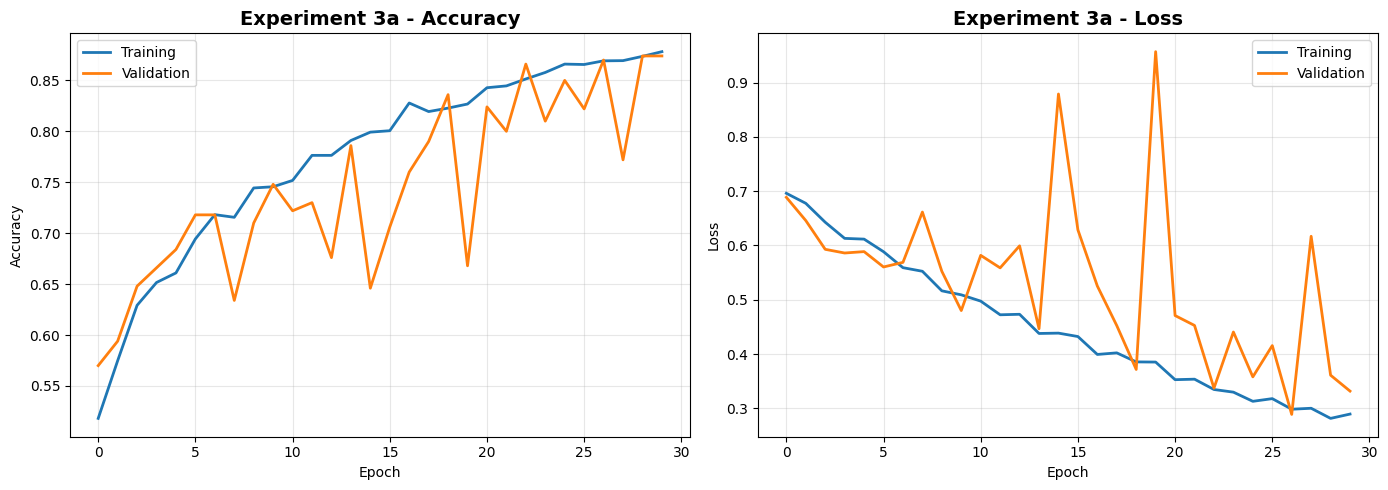

In [7]:
training_size = 5000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_5000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3a RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3a: From Scratch - 5,000 samples',
    'training_size': 5000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3a - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3a - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Experiment 3b - FROM SCRATCH WITH 15,000 SAMPLES**

Dataset created: 15000 training, 500 val, 500 test
Found 15000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.5233 - loss: 0.7477 - val_accuracy: 0.5380 - val_loss: 0.6791
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6228 - loss: 0.6546 - val_accuracy: 0.6740 - val_loss: 0.5775
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.6935 - loss: 0.5877 - val_accuracy: 0.7200 - val_loss: 0.5475
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.7348 - loss: 0.5315 - val_accuracy: 0.7840 - val_loss: 0.4937
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7737 - loss: 0.4828 - val_accuracy: 0.7640 - val_loss: 0.4919
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7941 - loss: 0.4484 - val_accuracy: 0.7800 - val_loss: 0.4765
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.8108 - loss: 0.4128 - val_accuracy: 0.8440 - val_loss: 0.3516
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8266 - loss: 0.3835 - 

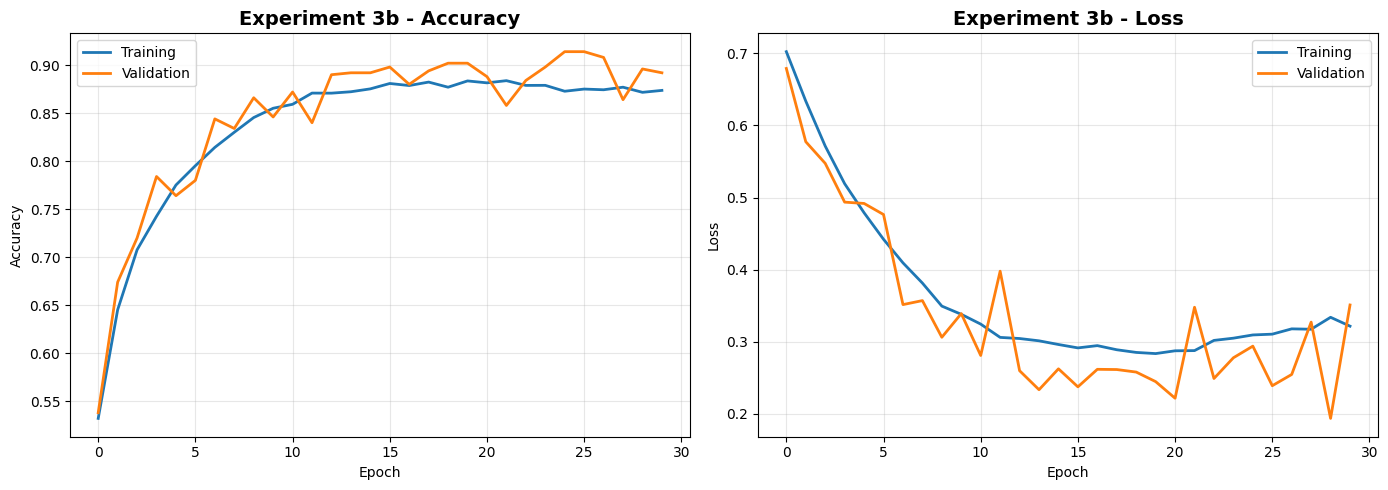

In [8]:
training_size = 15000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_15000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3b RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3b: From Scratch - 15,000 samples',
    'training_size': 15000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3b - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3b - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Experiment 3c - FROM SCRATCH WITH 20,000 SAMPLES**

Dataset created: 20000 training, 500 val, 500 test
Found 20000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.5648 - loss: 0.6768 - val_accuracy: 0.7020 - val_loss: 0.5666
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.6753 - loss: 0.6027 - val_accuracy: 0.7160 - val_loss: 0.5427
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7344 - loss: 0.5395 - val_accuracy: 0.7940 - val_loss: 0.4396
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7698 - loss: 0.4784 - val_accuracy: 0.8180 - val_loss: 0.3927
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7969 - loss: 0.4397 - val_accuracy: 0.8480 - val_loss: 0.3529
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.8254 - loss: 0.3911 - val_accuracy: 0.8680 - val_loss: 0.3190
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8451 - loss: 0.3637 - val_accuracy: 0.8700 - val_loss: 0.3079
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.8562 - loss: 0.3395 - 

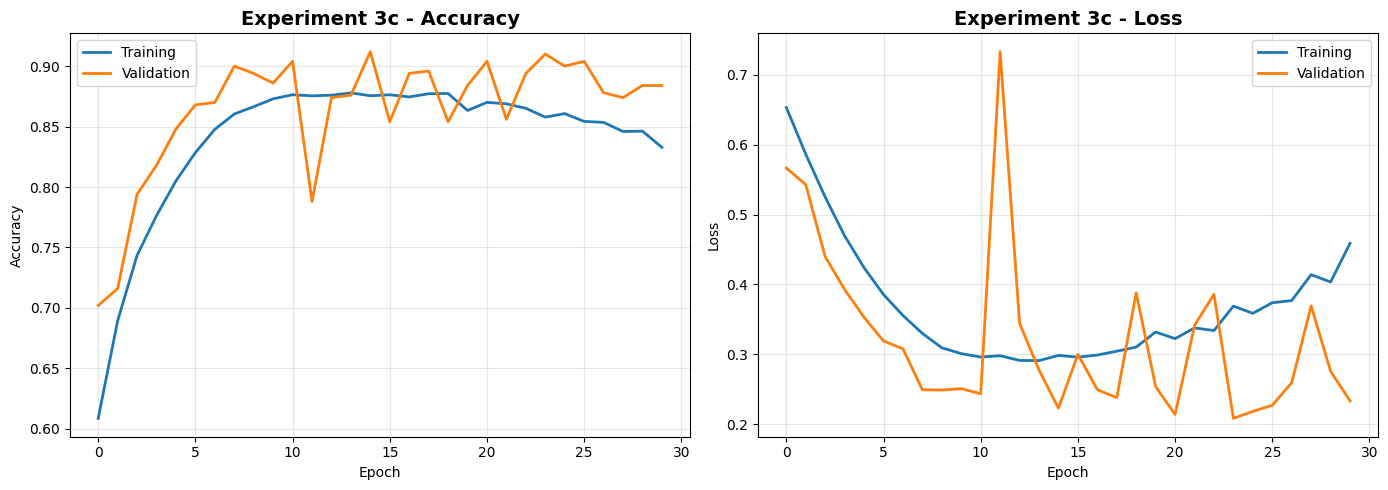

In [9]:
training_size = 20000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_20000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3c RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3c: From Scratch - 20,000 samples',
    'training_size': 20000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3c - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3c - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Experiment 4a - PRETRAINED WITH 1,000 SAMPLES**

Dataset created: 1000 training, 500 val, 500 test
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.7451 - loss: 31.2405 - val_accuracy: 0.9260 - val_loss: 1.4467
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9004 - loss: 0.9975 - val_accuracy: 0.9260 - val_loss: 0.5890
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.8699 - loss: 0.7854 - val_accuracy: 0.9240 - val_loss: 0.4307
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9119 - loss: 0.3982 - val_accuracy: 0.9460 - val_loss: 0.4857
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9162 - loss: 0.4408 - val_accuracy: 0.9420 - val_loss: 0.5163
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9162 - loss: 0.5356 - val_accuracy: 0.9360 - val_loss: 0.5641
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.9331 - loss: 0.4320 - val_accuracy: 0.9020 - val_loss: 1.5624
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9456 - loss: 0.3599 - val_accuracy: 

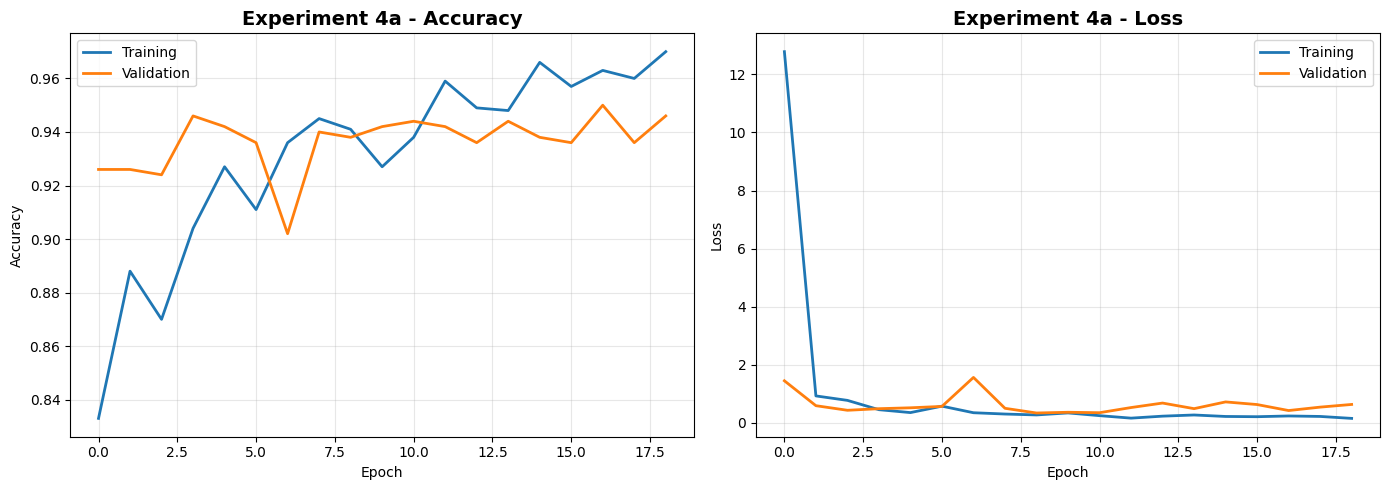

In [10]:
training_size = 1000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_1000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

# Build pretrained model
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4a RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4a: Pretrained - 1,000 samples',
    'training_size': 1000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4a - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4a - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout(); plt.show()


**Experiment 4b - PRETRAINED WITH 10,000 SAMPLES**

Dataset created: 10000 training, 500 val, 500 test
Found 10000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.8549 - loss: 4.0942 - val_accuracy: 0.9540 - val_loss: 0.2572
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.9136 - loss: 0.4012 - val_accuracy: 0.9580 - val_loss: 0.1337
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9265 - loss: 0.2817 - val_accuracy: 0.9600 - val_loss: 0.1992
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9343 - loss: 0.2707 - val_accuracy: 0.9660 - val_loss: 0.2110
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.9348 - loss: 0.2583 - val_accuracy: 0.9640 - val_loss: 0.1124
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9284 - loss: 0.2453 - val_accuracy: 0.9620 - val_loss: 0.1214
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.9396 - loss: 0.2107 - val_accuracy: 0.9660 - val_loss: 0.1098
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9491 - loss: 0.2012 -

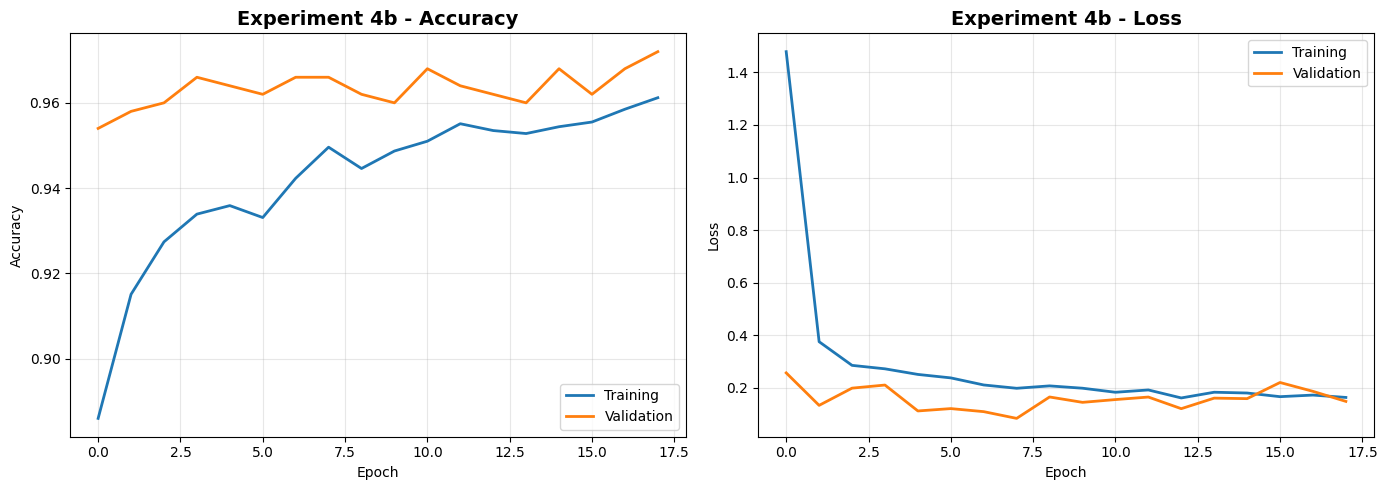

In [11]:
training_size = 10000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_10000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4b RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4b: Pretrained - 10,000 samples',
    'training_size': 10000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4b - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4b - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Experiment 4c-i - PRETRAINED WITH 5,000 SAMPLES**

Dataset created: 5000 training, 500 val, 500 test
Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.8316 - loss: 7.9265 - val_accuracy: 0.9460 - val_loss: 0.3501
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9027 - loss: 0.5681 - val_accuracy: 0.9480 - val_loss: 0.3867
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9256 - loss: 0.4125 - val_accuracy: 0.9620 - val_loss: 0.2106
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9320 - loss: 0.3433 - val_accuracy: 0.9460 - val_loss: 0.2567
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9328 - loss: 0.3343 - val_accuracy: 0.9540 - val_loss: 0.1962
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.9373 - loss: 0.2809 - val_accuracy: 0.9600 - val_loss: 0.2020
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - accuracy: 0.9434 - loss: 0.2753 - val_accuracy: 0.9540 - val_loss: 0.2612
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.9457 - loss: 0.280

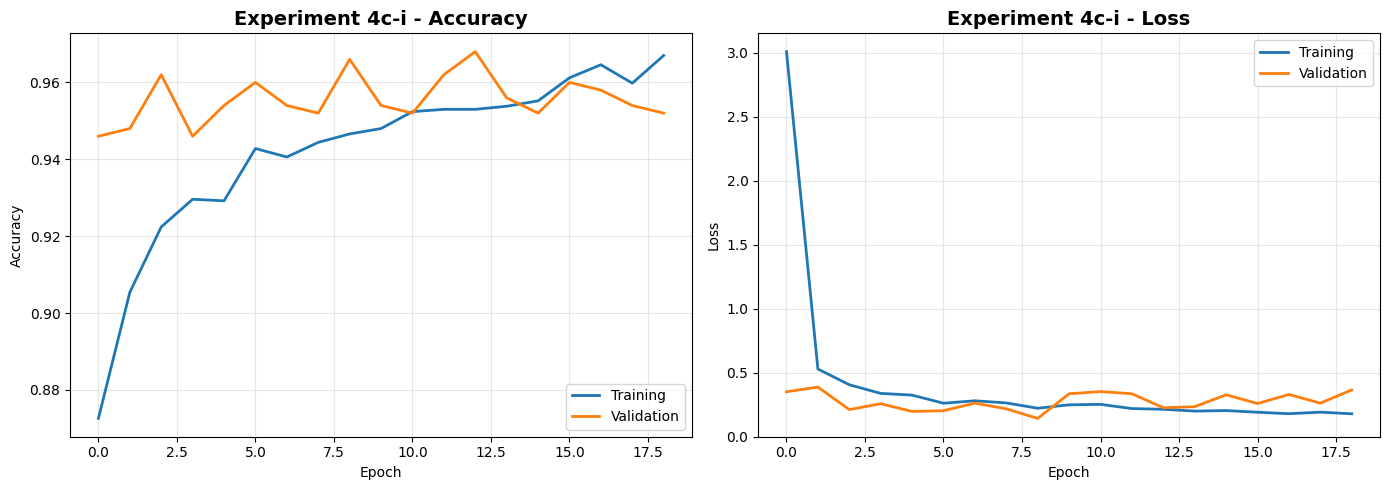

In [12]:
training_size = 5000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_5000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4c-i RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4c-i: Pretrained - 5,000 samples',
    'training_size': 5000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4c-i - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4c-i - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout(); plt.show()


**Experiment 4c-ii - PRETRAINED WITH 15,000 SAMPLES**

Dataset created: 15000 training, 500 val, 500 test
Found 15000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 99ms/step - accuracy: 0.8540 - loss: 5.2008 - val_accuracy: 0.9620 - val_loss: 0.1200
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9156 - loss: 0.3561 - val_accuracy: 0.9380 - val_loss: 0.3114
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9270 - loss: 0.2740 - val_accuracy: 0.9620 - val_loss: 0.1196
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9325 - loss: 0.2509 - val_accuracy: 0.9580 - val_loss: 0.2147
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9417 - loss: 0.2212 - val_accuracy: 0.9500 - val_loss: 0.1881
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9391 - loss: 0.2249 - val_accuracy: 0.9480 - val_loss: 0.1931
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9421 - loss: 0.1987 - val_accuracy: 0.9660 - val_loss: 0.1838
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9451 - loss: 0.1997 - 

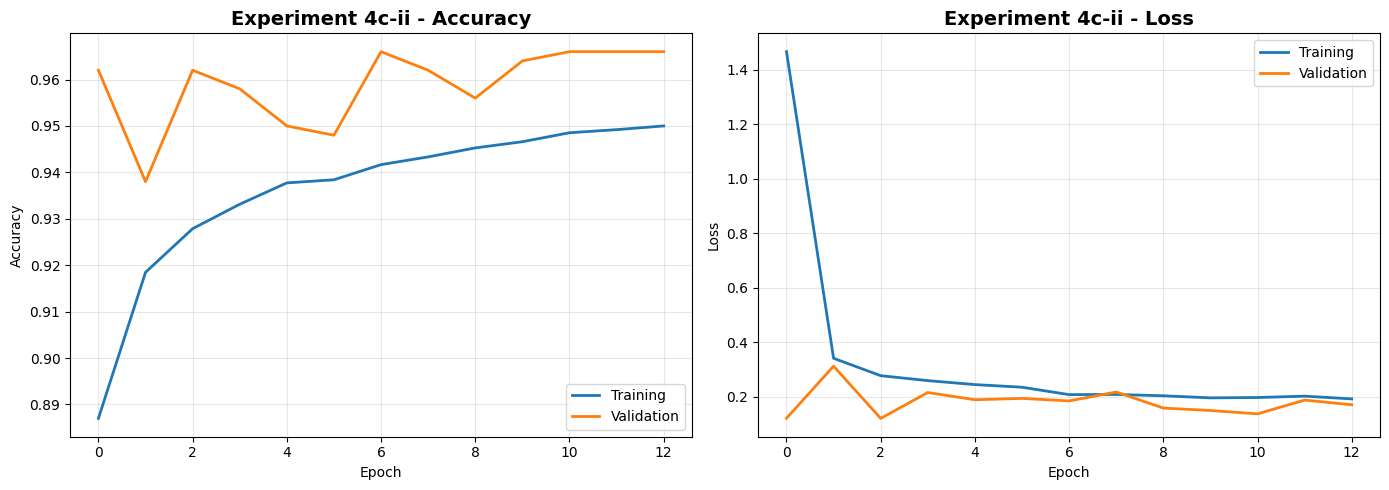

In [13]:
training_size = 15000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_15000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4c-ii RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 4c-ii: Pretrained - 15,000 samples',
    'training_size': 15000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4c-ii - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4c-ii - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout(); plt.show()


**RESULTS SUMMARY**

In [14]:
import pandas as pd
from IPython.display import display
results_df = pd.DataFrame(results)

display(results_df[['experiment', 'training_size', 'model_type', 'test_accuracy']])


,experiment,training_size,model_type,test_accuracy
0,"Experiment 1: From Scratch - 1,000 samples",1000,scratch,0.744
1,"Experiment 2: From Scratch - 10,000 samples",10000,scratch,0.898
2,"Experiment 3a: From Scratch - 5,000 samples",5000,scratch,0.892
3,"Experiment 3b: From Scratch - 15,000 samples",15000,scratch,0.926
4,"Experiment 3c: From Scratch - 20,000 samples",20000,scratch,0.918
5,"Experiment 4a: Pretrained - 1,000 samples",1000,pretrained,0.950
6,"Experiment 4b: Pretrained - 10,000 samples",10000,pretrained,0.968
7,"Experiment 4c-i: Pretrained - 5,000 samples",5000,pretrained,0.952
8,"Experiment 4c-ii: Pretrained - 15,000 samples",15000,pretrained,0.960


**CONCLUSIONS**

In [17]:
scratch_models = results_df[results_df['model_type'] == 'scratch'].copy()
pretrained_models = results_df[results_df['model_type'] == 'pretrained'].copy()

best_scratch = scratch_models.loc[scratch_models['test_accuracy'].idxmax()]
best_pretrained = pretrained_models.loc[pretrained_models['test_accuracy'].idxmax()]

print("\n1. OPTIMAL TRAINING SIZES:")
print(f"\n   FROM SCRATCH MODEL:")
print(f"   - Optimal Training Size: {int(best_scratch['training_size'])} samples")
print(f"   - Test Accuracy: {best_scratch['test_accuracy']*100:.2f}%")
print(f"   - Test Loss: {best_scratch['test_loss']:.4f}")
print(f"   - Experiment: {best_scratch['experiment']}")

print(f"\n   PRETRAINED MODEL:")
print(f"   - Optimal Training Size: {int(best_pretrained['training_size'])} samples")
print(f"   - Test Accuracy: {best_pretrained['test_accuracy']*100:.2f}%")
print(f"   - Test Loss: {best_pretrained['test_loss']:.4f}")
print(f"   - Experiment: {best_pretrained['experiment']}")

print("\n2. IMPACT OF TRAINING DATA SIZE (1,000 vs 10,000 samples):")

scratch_1k = results_df[(results_df['model_type'] == 'scratch') &
                         (results_df['training_size'] == 1000)]['test_accuracy'].values[0]
scratch_10k = results_df[(results_df['model_type'] == 'scratch') &
                          (results_df['training_size'] == 10000)]['test_accuracy'].values[0]
pretrained_1k = results_df[(results_df['model_type'] == 'pretrained') &
                            (results_df['training_size'] == 1000)]['test_accuracy'].values[0]
pretrained_10k = results_df[(results_df['model_type'] == 'pretrained') &
                             (results_df['training_size'] == 10000)]['test_accuracy'].values[0]

print(f"\n   FROM SCRATCH:")
print(f"   - 1,000 samples: {scratch_1k*100:.2f}%")
print(f"   - 10,000 samples: {scratch_10k*100:.2f}%")
print(f"   - Improvement: +{(scratch_10k - scratch_1k)*100:.2f} percentage points " +
      f"({((scratch_10k - scratch_1k)/scratch_1k*100):.1f}% relative increase)")

print(f"\n   PRETRAINED:")
print(f"   - 1,000 samples: {pretrained_1k*100:.2f}%")
print(f"   - 10,000 samples: {pretrained_10k*100:.2f}%")
print(f"   - Improvement: +{(pretrained_10k - pretrained_1k)*100:.2f} percentage points " +
      f"({((pretrained_10k - pretrained_1k)/pretrained_1k*100):.1f}% relative increase)")

print("\n3. FROM SCRATCH VS PRETRAINED COMPARISON:")

sample_sizes = sorted(results_df['training_size'].unique())

for size in sample_sizes:
    scratch_acc = results_df[(results_df['training_size'] == size) &
                              (results_df['model_type'] == 'scratch')]['test_accuracy'].values
    pretrained_acc = results_df[(results_df['training_size'] == size) &
                                 (results_df['model_type'] == 'pretrained')]['test_accuracy'].values

    if len(scratch_acc) > 0 and len(pretrained_acc) > 0:
        diff = pretrained_acc[0] - scratch_acc[0]
        advantage = "Pretrained" if diff > 0 else "From Scratch"

        print(f"\n   Training Size: {int(size):,} samples")
        print(f"   - From Scratch:  {scratch_acc[0]*100:.2f}%")
        print(f"   - Pretrained:    {pretrained_acc[0]*100:.2f}%")
        print(f"   - Advantage:     {advantage} by {abs(diff)*100:.2f} percentage points")


1. OPTIMAL TRAINING SIZES:

   FROM SCRATCH MODEL:
   - Optimal Training Size: 15000 samples
   - Test Accuracy: 92.60%
   - Test Loss: 0.1617
   - Experiment: Experiment 3b: From Scratch - 15,000 samples

   PRETRAINED MODEL:
   - Optimal Training Size: 10000 samples
   - Test Accuracy: 96.80%
   - Test Loss: 0.1803
   - Experiment: Experiment 4b: Pretrained - 10,000 samples

2. IMPACT OF TRAINING DATA SIZE (1,000 vs 10,000 samples):

   FROM SCRATCH:
   - 1,000 samples: 74.40%
   - 10,000 samples: 89.80%
   - Improvement: +15.40 percentage points (20.7% relative increase)

   PRETRAINED:
   - 1,000 samples: 95.00%
   - 10,000 samples: 96.80%
   - Improvement: +1.80 percentage points (1.9% relative increase)

3. FROM SCRATCH VS PRETRAINED COMPARISON:

   Training Size: 1,000 samples
   - From Scratch:  74.40%
   - Pretrained:    95.00%
   - Advantage:     Pretrained by 20.60 percentage points

   Training Size: 5,000 samples
   - From Scratch:  89.20%
   - Pretrained:    95.20%
   - 

**Performance Comparison**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

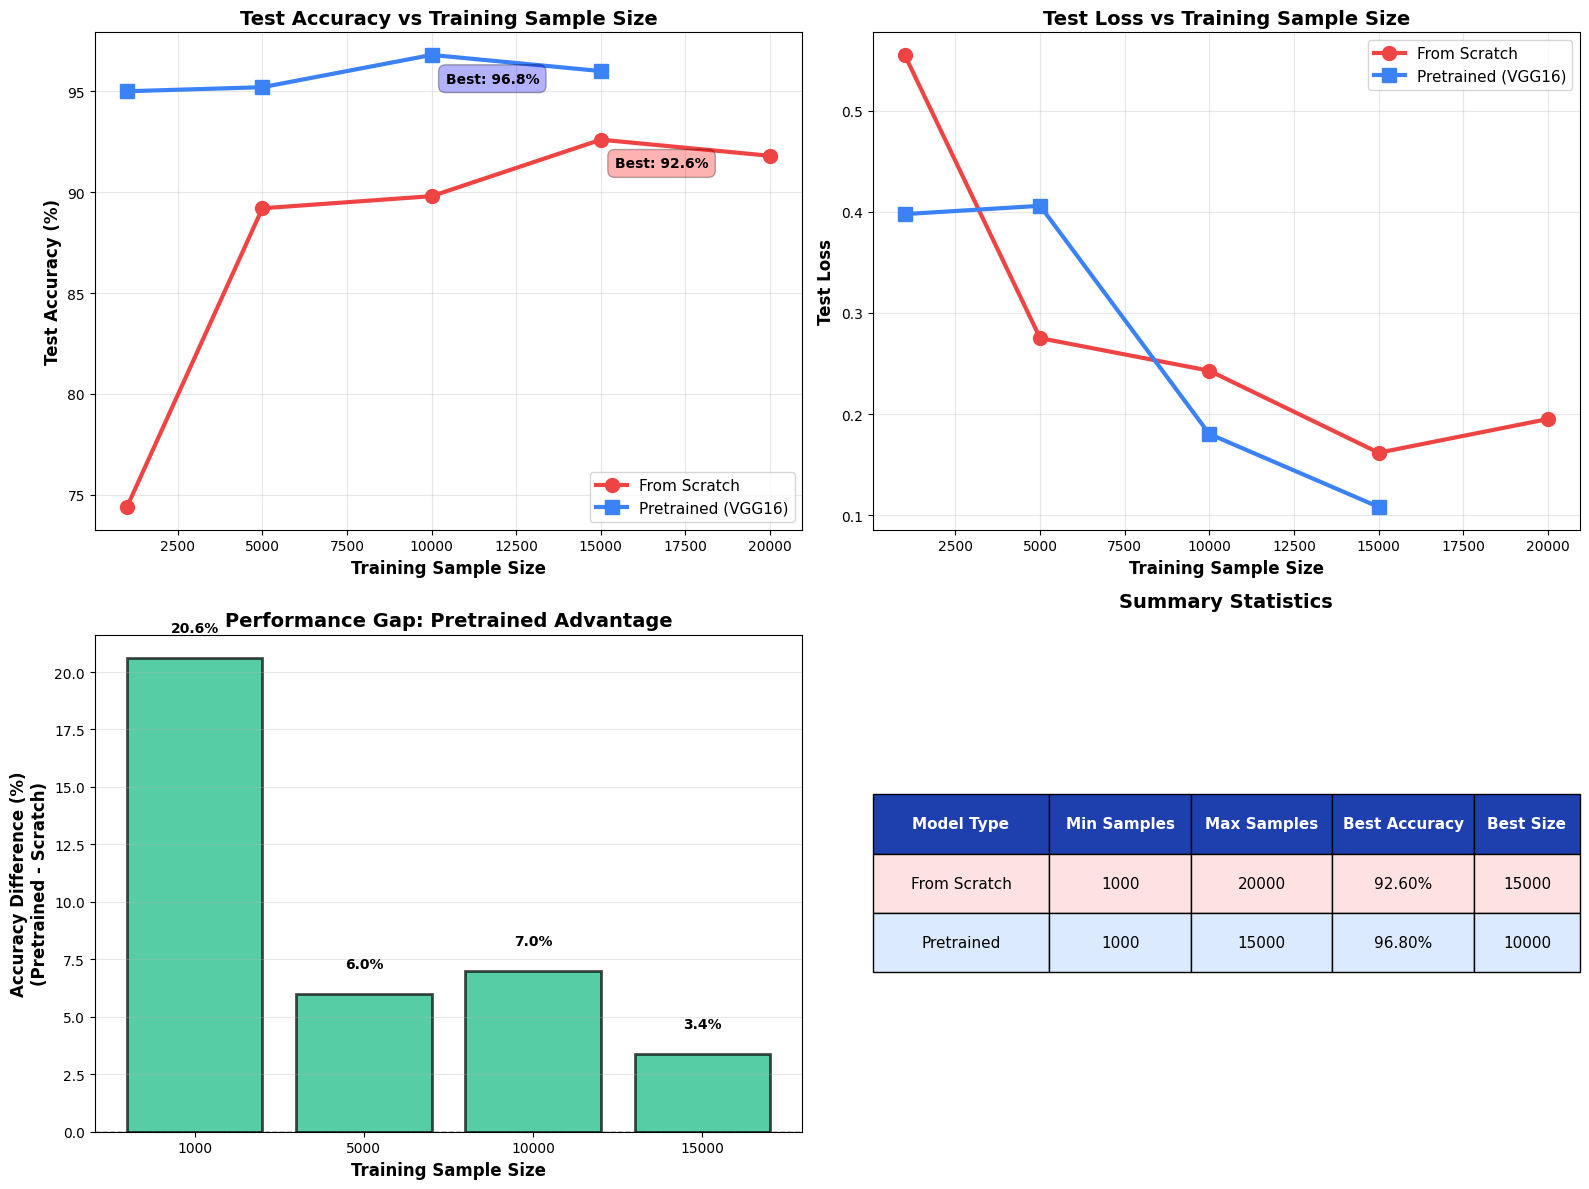

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Test Accuracy vs Training Size
ax1 = axes[0, 0]
scratch_data = scratch_models.sort_values('training_size')
pretrained_data = pretrained_models.sort_values('training_size')

ax1.plot(scratch_data['training_size'], scratch_data['test_accuracy']*100,
         'o-', linewidth=3, markersize=10, label='From Scratch', color='#ef4444')
ax1.plot(pretrained_data['training_size'], pretrained_data['test_accuracy']*100,
         's-', linewidth=3, markersize=10, label='Pretrained (VGG16)', color='#3b82f6')

ax1.set_xlabel('Training Sample Size', fontsize=12, fontweight='bold')
ax1.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Test Accuracy vs Training Sample Size', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax1.annotate(f'Best: {best_scratch["test_accuracy"]*100:.1f}%',
            xy=(best_scratch['training_size'], best_scratch['test_accuracy']*100),
            xytext=(10, -20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.3),
            fontsize=10, fontweight='bold')

ax1.annotate(f'Best: {best_pretrained["test_accuracy"]*100:.1f}%',
            xy=(best_pretrained['training_size'], best_pretrained['test_accuracy']*100),
            xytext=(10, -20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='blue', alpha=0.3),
            fontsize=10, fontweight='bold')

# Plot 2: Test Loss vs Training Size
ax2 = axes[0, 1]
ax2.plot(scratch_data['training_size'], scratch_data['test_loss'],
         'o-', linewidth=3, markersize=10, label='From Scratch', color='#ef4444')
ax2.plot(pretrained_data['training_size'], pretrained_data['test_loss'],
         's-', linewidth=3, markersize=10, label='Pretrained (VGG16)', color='#3b82f6')

ax2.set_xlabel('Training Sample Size', fontsize=12, fontweight='bold')
ax2.set_ylabel('Test Loss', fontsize=12, fontweight='bold')
ax2.set_title('Test Loss vs Training Sample Size', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Plot 3: Performance Gap
ax3 = axes[1, 0]

common_sizes = set(scratch_data['training_size']) & set(pretrained_data['training_size'])
gaps = []
sizes = []
for size in sorted(common_sizes):
    scratch_acc = scratch_data[scratch_data['training_size']==size]['test_accuracy'].values[0]
    pretrained_acc = pretrained_data[pretrained_data['training_size']==size]['test_accuracy'].values[0]
    gap = (pretrained_acc - scratch_acc) * 100
    gaps.append(gap)
    sizes.append(size)

colors = ['#10b981' if g > 0 else '#ef4444' for g in gaps]
ax3.bar(range(len(sizes)), gaps, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_xticks(range(len(sizes)))
ax3.set_xticklabels([f'{int(s)}' for s in sizes])
ax3.set_xlabel('Training Sample Size', fontsize=12, fontweight='bold')
ax3.set_ylabel('Accuracy Difference (%)\n(Pretrained - Scratch)', fontsize=12, fontweight='bold')
ax3.set_title('Performance Gap: Pretrained Advantage', fontsize=14, fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax3.grid(True, alpha=0.3, axis='y')

for i, (size, gap) in enumerate(zip(sizes, gaps)):
    ax3.text(i, gap + (1 if gap > 0 else -1), f'{gap:.1f}%',
            ha='center', va='bottom' if gap > 0 else 'top',
            fontweight='bold', fontsize=10)

# Plot 4: Summary Statistics Table
ax4 = axes[1, 1]
ax4.axis('tight')
ax4.axis('off')

table_data = []
table_data.append(['Model Type', 'Min Samples', 'Max Samples', 'Best Accuracy', 'Best Size'])
table_data.append(['From Scratch',
                   f"{int(scratch_data['training_size'].min())}",
                   f"{int(scratch_data['training_size'].max())}",
                   f"{scratch_models['test_accuracy'].max()*100:.2f}%",
                   f"{int(best_scratch['training_size'])}"])
table_data.append(['Pretrained',
                   f"{int(pretrained_data['training_size'].min())}",
                   f"{int(pretrained_data['training_size'].max())}",
                   f"{pretrained_models['test_accuracy'].max()*100:.2f}%",
                   f"{int(best_pretrained['training_size'])}"])

table = ax4.table(cellText=table_data, cellLoc='center', loc='center',
                 colWidths=[0.25, 0.20, 0.20, 0.20, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

for i in range(5):
    table[(0, i)].set_facecolor('#1e40af')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, 3):
    color = '#fee2e2' if i == 1 else '#dbeafe'
    for j in range(5):
        table[(i, j)].set_facecolor(color)

ax4.set_title('Summary Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt